In [3]:
print ("hola mundo"
       )

hola mundo


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df0 = pd.read_csv('customer_shopping_data.csv')
df0.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [6]:
df0.shape

(99457, 10)

In [7]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [8]:
#valores unicos del atributo
print ("valores unicos en gender:", df0['gender'].unique())



#numero de valores diferentes del atributo
print ("numero de valores unicos:", df0['gender'].nunique())

valores unicos en gender: ['Female' 'Male']
numero de valores unicos: 2


In [9]:
#valores unicos del atributo
print ("valores unicos en payment_method:", df0['payment_method'].unique())



#numero de valores deiferentes del atributo
print ("numero de valores unicos:", df0['payment_method'].nunique())

valores unicos en payment_method: ['Credit Card' 'Debit Card' 'Cash']
numero de valores unicos: 3


In [10]:
df1= df0.copy()

In [11]:
# convertir el "invoice date" en fecha

df1["invoice_date"] = pd.to_datetime(df1["invoice_date"], dayfirst=True)

In [12]:
df1["invoice_date"].head(3)

0   2022-08-05
1   2021-12-12
2   2021-11-09
Name: invoice_date, dtype: datetime64[ns]

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_no      99457 non-null  object        
 1   customer_id     99457 non-null  object        
 2   gender          99457 non-null  object        
 3   age             99457 non-null  int64         
 4   category        99457 non-null  object        
 5   quantity        99457 non-null  int64         
 6   price           99457 non-null  float64       
 7   payment_method  99457 non-null  object        
 8   invoice_date    99457 non-null  datetime64[ns]
 9   shopping_mall   99457 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 7.6+ MB


In [14]:
#agregar columnas para meses y años
df1["year"]= df1["invoice_date"].dt.strftime("%Y")

In [15]:
df1.head(2)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,year
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,2022
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,2021


In [16]:
#agregar columnas para meses git
df1["month"]= df1["invoice_date"].dt.month

In [17]:
df1.head(3)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,year,month
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,2022,8
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,2021,12
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,2021,11


In [18]:
df2= df1.copy()

In [19]:
df2.head(3)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,year,month
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,2022,8
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,2021,12
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,2021,11


In [20]:
#Funcion para definir categoria de edades 

def category_f (age):
    if (age>= 18) and (age<25):
        return "18-24"
    elif (age>=25) and (age<35):
        return "25-34"
    elif (age>=35) and (age<50):
        return "35-49"
    elif (age>=50) and (age<65):
        return "50-64"
    else:
        return "65..."
    


In [21]:
df2["age_cat"] = df2["age"].apply(category_f)

In [22]:
df2.head(4)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,year,month,age_cat
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,2022,8,25-34
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,2021,12,18-24
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,2021,11,18-24
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,2021,5,65...


In [23]:
df2[["age", "age_cat"]].head(3)

,age,age_cat
0,28,25-34
1,21,18-24
2,20,18-24


In [24]:
df2[["age", "age_cat"]].tail(5)

,age,age_cat
99452,45,35-49
99453,27,25-34
99454,63,50-64
99455,56,50-64
99456,36,35-49


1. Como es la relacion de genero y numero de transacciones


[Text(0.5, 1.0, 'relacion de genero y nro de transacciones')]

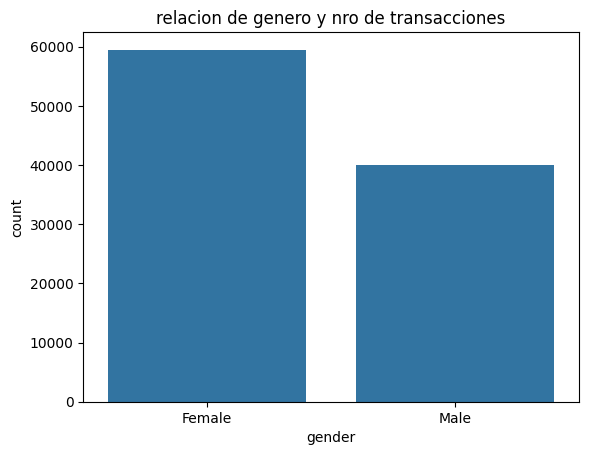

In [25]:
#histograma cantidad transacciones por genero
sns.countplot(data=df1, x="gender").set(title="relacion de genero y nro de transacciones")

In [26]:
#cantidad de elementos por categoria

gender_quantity = df1 ["gender"].value_counts()
print (gender_quantity)


gender
Female    59482
Male      39975
Name: count, dtype: int64


Text(0.5, 1.0, 'Relacion de transacciones entre mujeres y hombres')

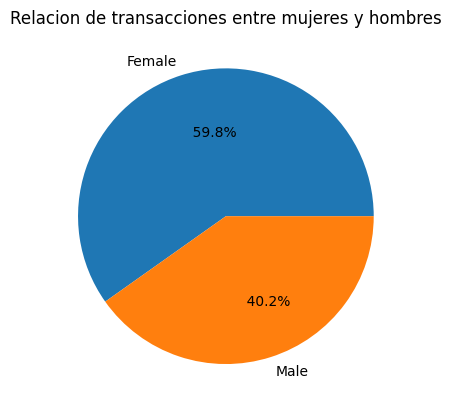

In [27]:

plt.pie(gender_quantity, labels=gender_quantity.index, autopct="%11.1f%%")
plt.title("Relacion de transacciones entre mujeres y hombres")

######.2 Como es la distribución de edades por número de transacciones"


In [28]:
df2.head(2)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,year,month,age_cat
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,2022,8,25-34
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,2021,12,18-24


In [29]:
df2["age"].describe()


count    99457.000000
mean        43.427089
std         14.990054
min         18.000000
25%         30.000000
50%         43.000000
75%         56.000000
max         69.000000
Name: age, dtype: float64

[Text(0.5, 1.0, 'Edades por Transacción')]

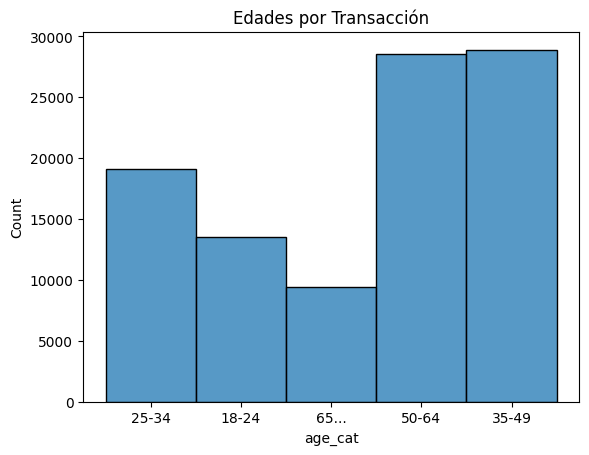

In [30]:
## Histograma
sns.histplot(data=df2, x="age_cat").set(title="Edades por Transacción")

In [31]:
age_quantity = df2 ["age_cat"].value_counts()
print (age_quantity)


age_cat
35-49    28906
50-64    28547
25-34    19081
18-24    13496
65...     9427
Name: count, dtype: int64


Text(0.5, 1.0, 'Relacion de transacciones y categoría de edades')

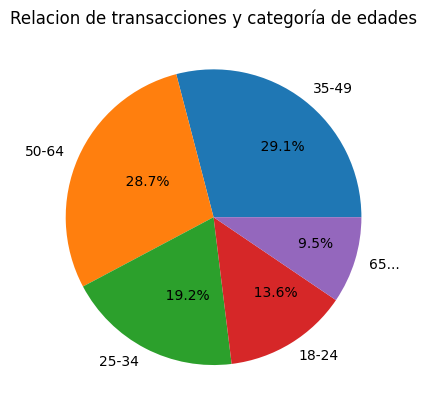

In [32]:
plt.pie(age_quantity, labels=age_quantity.index, autopct="%11.1f%%")
plt.title("Relacion de transacciones y categoría de edades")

###.3 ¿Qué grupo de edad gastó más dinero?

In [33]:
#df nueva

df3= df2.copy()

In [34]:
df3.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,year,month,age_cat
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,2022,8,25-34
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,2021,12,18-24
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,2021,11,18-24
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,2021,5,65...
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,2021,10,50-64


In [35]:
df3["total"]= df3 ["quantity"]* df3["price"]

In [36]:
df3.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,year,month,age_cat,total
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,2022,8,25-34,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,2021,12,18-24,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,2021,11,18-24,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,2021,5,65...,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,2021,10,50-64,242.40


In [37]:
df3 [["quantity", "price", "total"]].head(5)

,quantity,price,total
0,5,1500.40,7502.00
1,3,1800.51,5401.53
2,1,300.08,300.08
3,5,3000.85,15004.25
4,4,60.60,242.40


In [38]:
df_age_total= df3.groupby("age_cat")["total"].sum()
print(df_age_total)

age_cat
18-24    33454083.87
25-34    47805115.52
35-49    74358776.99
50-64    71961241.44
65...    23926576.43
Name: total, dtype: float64


<Axes: xlabel='age_cat'>

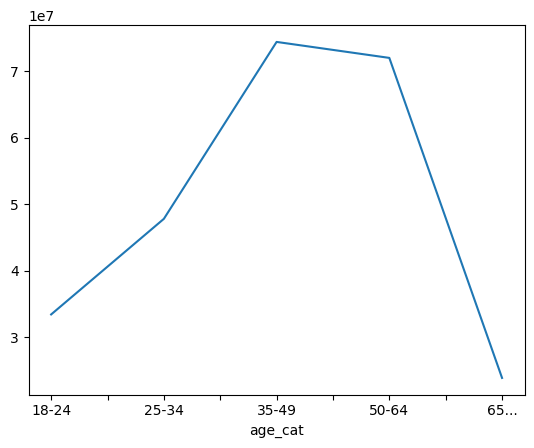

In [39]:
df_age_total.plot()

####.4 Comprobar la distribución por edades entre hombres y mujeres



# Agrupar por género y rango de edad, contando la cantidad
conteo_por_grupo = df.groupby(['genero', 'rango_edad']).size().reset_index(name='cantidad')

# Crear un gráfico de barras
conteo_por_grupo.pivot(index='rango_edad', columns='genero', values='cantidad').plot(kind='bar')
plt.title('Distribución por Edad y Género')
plt.xlabel('Rango de Edad')
plt.ylabel('Cantidad')
plt.show()

In [40]:
df2.head()


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,year,month,age_cat
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,2022,8,25-34
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,2021,12,18-24
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,2021,11,18-24
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,2021,5,65...
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,2021,10,50-64


In [41]:
# Agrupar por género y rango de edad, contando la cantidad

df_conteo_por_grupo = df2.groupby(['gender', 'age_cat']).size().reset_index(name='cantidad')

In [42]:
df_conteo_por_grupo.head(10)

,gender,age_cat,cantidad
0,Female,18-24,7938
1,Female,25-34,11474
2,Female,35-49,17355
3,Female,50-64,17080
4,Female,65...,5635
5,Male,18-24,5558
6,Male,25-34,7607
7,Male,35-49,11551
8,Male,50-64,11467
9,Male,65...,3792


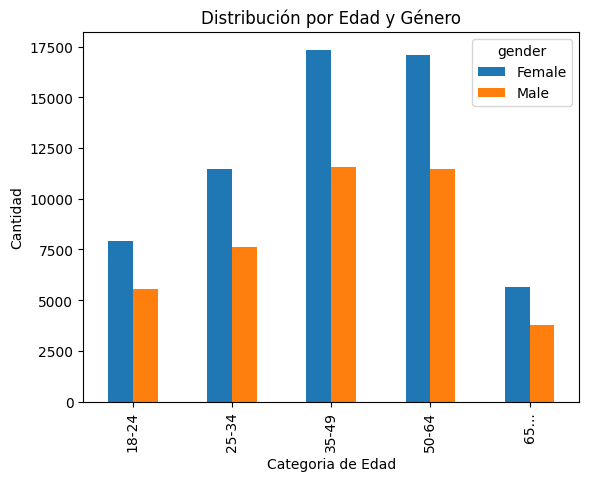

In [43]:
# Crear un gráfico de barras
df_conteo_por_grupo.pivot(index='age_cat', columns='gender', values='cantidad').plot(kind='bar')
plt.title('Distribución por Edad y Género')
plt.xlabel('Categoria de Edad')
plt.ylabel('Cantidad')
plt.show()


.5 Forma de pago y número de transacciones

In [44]:
df1.head()


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,year,month
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,2022,8
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,2021,12
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,2021,11
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,2021,5
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,2021,10


In [45]:
# Agrupar por forma de pago y contar las transacciones
conteo_formas_pago = df1.groupby('payment_method').size()

In [46]:
# Mostrar el resultado
print(conteo_formas_pago)

payment_method
Cash           44447
Credit Card    34931
Debit Card     20079
dtype: int64


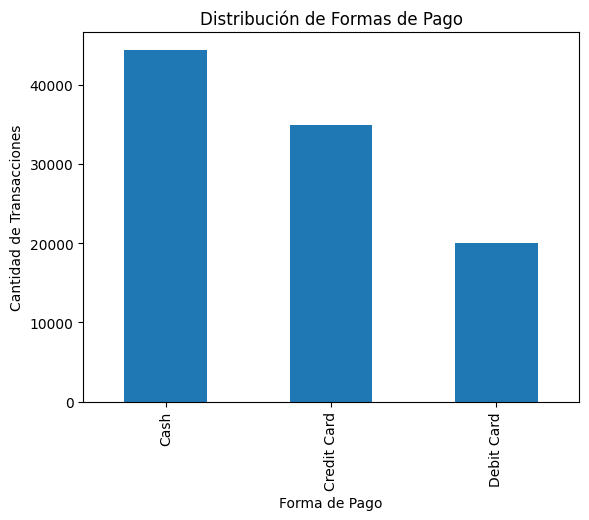

In [47]:
# Crear un gráfico de barras
conteo_formas_pago.plot(kind='bar')
plt.title('Distribución de Formas de Pago')
plt.xlabel('Forma de Pago')
plt.ylabel('Cantidad de Transacciones')
plt.show()

####- .6 Relacion entre la cantidad de dinero gastada y el método de pago

In [48]:
df1.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,year,month
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,2022,8
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,2021,12
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,2021,11
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,2021,5
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,2021,10


In [59]:
# Agrupamos los datos por método de pago y sumamos las cantidades gastadas
price_paymethod = df1.groupby('payment_method')['price'].sum()/1000000 #DIVIDIR POR 1 MILLON PARA EXPRESAR EN MILLONES

# Imprimimos el resultado
print(price_paymethod)

payment_method
Cash           30.705031
Credit Card    24.051477
Debit Card     13.794858
Name: price, dtype: float64


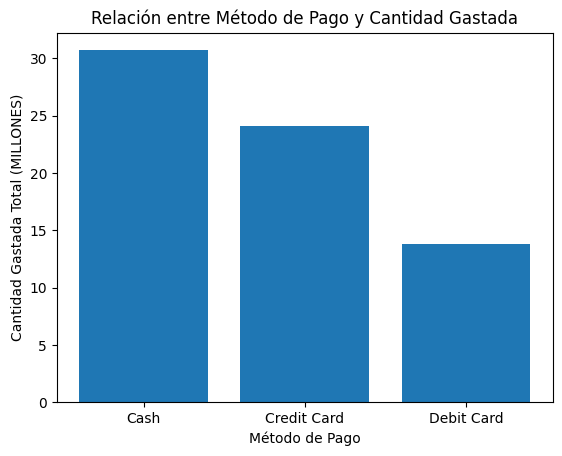

In [58]:

# Create a bar chart
plt.bar(price_paymethod.index, price_paymethod.values)
plt.xlabel("Método de Pago")
plt.ylabel("Cantidad Gastada Total (MILLONES)")
plt.title("Relación entre Método de Pago y Cantidad Gastada")
plt.show()